# Plant Disease Prediction

## Importing libraries

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [35]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1281 files belonging to 25 classes.


### Validation Image Preprocessing

In [36]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1281 files belonging to 25 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [37]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\jiten\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [41]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [42]:
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [43]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [44]:
cnn.add(tf.keras.layers.Flatten())

In [45]:
cnn.add(tf.keras.layers.Dense(units=2000,activation='relu'))

unit means number of Neural

In [46]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [47]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=25,activation='softmax'))

Change the unit size according to your data set size

### Compiling and Training Phase

In [48]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2000)           │    18,434,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │        50,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,656,281 (74.98 MB)

 Trainable params: 19,656,281 (74.98 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 440ms/step - accuracy: 0.0396 - loss: 7.3269 - val_accuracy: 0.0859 - val_loss: 3.1865
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 424ms/step - accuracy: 0.0813 - loss: 3.1173 - val_accuracy: 0.0882 - val_loss: 3.0815
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 423ms/step - accuracy: 0.1128 - loss: 3.0066 - val_accuracy: 0.1874 - val_loss: 2.6980
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 424ms/step - accuracy: 0.2185 - loss: 2.6441 - val_accuracy: 0.2701 - val_loss: 2.2142
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.2676 - loss: 2.4381 - val_accuracy: 0.4551 - val_loss: 1.9140
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 422ms/step - accuracy: 0.3692 - loss: 2.0359 - val_accuracy: 0.5699 - val_loss: 1.6992
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 421ms/step - accuracy: 0.4793 - loss: 1.7537 - val_accuracy: 0.5332 - val_loss: 1.4930
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 455ms/step - accuracy: 0.4929 - loss: 1.7006 - val_accu

## Evaluating Model

In [51]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8000 - loss: 0.6304
Training accuracy: 0.8274785280227661


In [52]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.8359 - loss: 0.5222
Validation accuracy: 0.8274785280227661


### Saving Model

In [53]:
cnn.save('trained_plant_disease_model.keras')

In [54]:
training_history.history #Return Dictionary of history

{'accuracy': [0.04683840647339821,
  0.08821233361959457,
  0.1436377763748169,
  0.2466822862625122,
  0.29195940494537354,
  0.39422327280044556,
  0.4933645725250244,
  0.5214676260948181,
  0.630757212638855,
  0.6760343313217163],
 'loss': [4.46254301071167,
  3.0943429470062256,
  2.910489559173584,
  2.546912431716919,
  2.314948320388794,
  1.955302119255066,
  1.684378981590271,
  1.5613559484481812,
  1.1461427211761475,
  1.0017660856246948],
 'val_accuracy': [0.0858704149723053,
  0.08821233361959457,
  0.18735362589359283,
  0.27010148763656616,
  0.4551132023334503,
  0.5698673129081726,
  0.5331771969795227,
  0.6174863576889038,
  0.8165495991706848,
  0.8274785280227661],
 'val_loss': [3.186509609222412,
  3.0814809799194336,
  2.6979684829711914,
  2.2142486572265625,
  1.9139832258224487,
  1.6992353200912476,
  1.4929842948913574,
  1.234910011291504,
  0.6398841738700867,
  0.5506113171577454]}

In [55]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [56]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

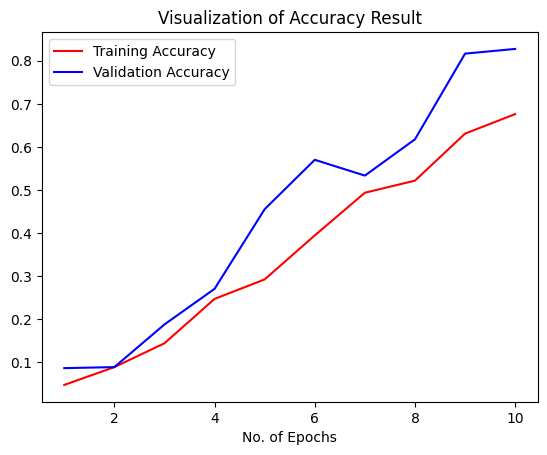

In [57]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [58]:
class_name = validation_set.class_names

In [59]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:\\Users\\jiten\\Downloads\\MRCEW Project\\New Plant Diseases Dataset(Augmented)\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1281 files belonging to 25 classes.


In [60]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1281/1281 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step


In [61]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [62]:
Y_true

<tf.Tensor: shape=(1281,), dtype=int64, numpy=array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64)>

In [63]:
predicted_categories

<tf.Tensor: shape=(1281,), dtype=int64, numpy=array([ 6,  4,  6, ..., 24, 24, 24], dtype=int64)>

In [64]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [65]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.78      0.67      0.72        54
                                 Apple___Black_rot       0.77      0.94      0.85        50
                          Apple___Cedar_apple_rust       0.73      0.88      0.80        50
                                   Apple___healthy       0.81      0.81      0.81        54
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.89      0.88        53
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00        51
               Corn_(maize)___Northern_Leaf_Blight       0.81      0.94      0.87        50
                            Corn_(maize)___healthy       0.62      0.96      0.75        46
                                 Grape___Black_rot       0.86      0.96      0.91        51
                      Grape___Esca_(Black_Measles)       0.92      0.94      0.

### Confusion Matrix Visualization

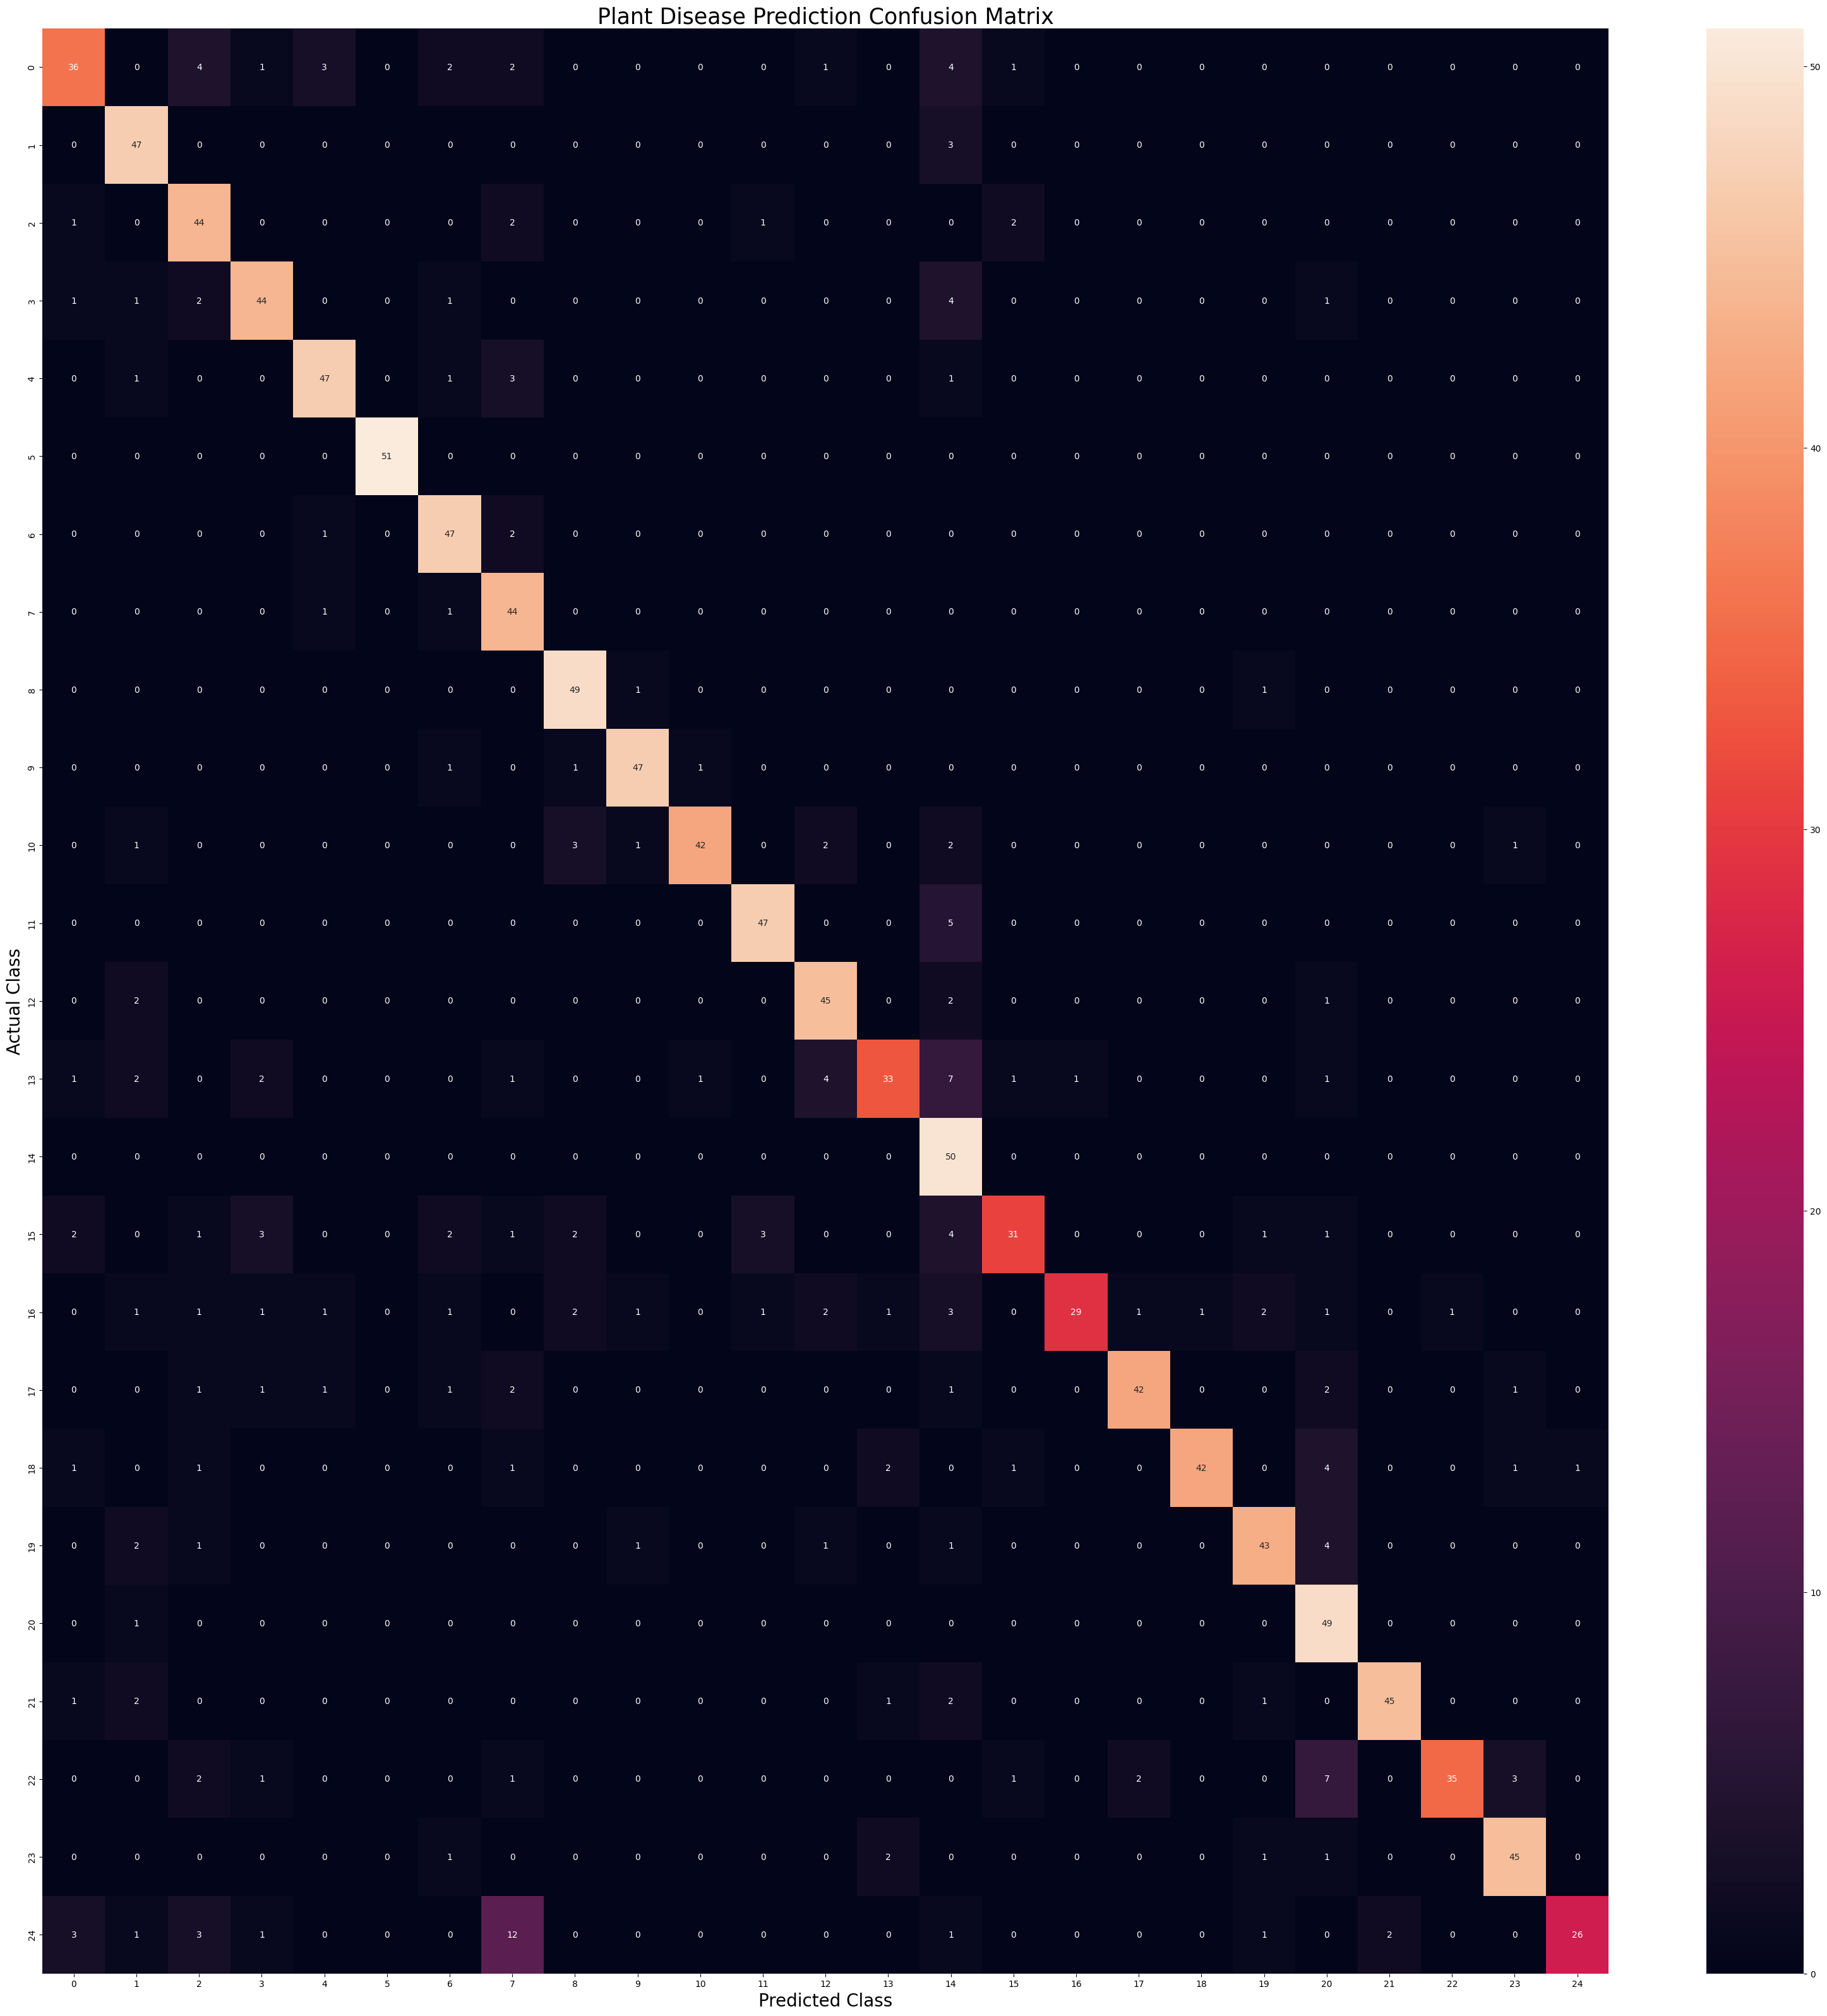

In [66]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()